# Preparing MUT CTNNB1 RNA-Seq Cohort

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator

# Import Samples with CTNNB1 Mutations
- Sample comes from CTNNB1:Mut "Query by Gene" on TCGA Firehose Legacy HCC Study
    - 114 samples ID'd
- "Altered samples: List of samples with alterations" File from Download tab


- Read CSV file and filter out "lihc_tcga:" characters at beginning of sample name (for cross-referencing to Overall TCGA Data Set)
    - TROUBLESHOOT: first sample still has ":" in sample name (see samples [0] )
- Final list also contains "Huge Symbol" and "Entrez Gene Id" columns present in Overall TCGA Data Set

In [2]:
with open('CTNNB1_mutation_samples.csv') as mutation_file:
    mutation_records = csv.reader(mutation_file)
    samples = []
    for mutation_record in mutation_records:
        p1 = mutation_record[0]
        p1 = p1[11:]
        samples.append(str(p1))
        break
    for mutation_record in mutation_records:
        p1 = mutation_record[0]
        p1 = p1[10:]
        samples.append(str(p1))

samples.append("Hugo_Symbol")

## Import Overall TCGA Data Set

- Data is downloaded from Summary page of TCGA Firehose Legacy HCC Study
    - lihc_tcga
        - data_RNA_Seq_v2_expression_median.txt
- Data is confirmed by 373/442 samples having RNA-Seq data (from Summary page of study under Genomic Profile Sample Counts); with "Hugo Symbol" and "Entrez Gene Id" columns, sums up to 375 columns


- Import CSV TCGA Data Set file as Pandas Dataframe

In [3]:
df = pd.read_csv("TCGA Data.csv")
col = df.head(20532)  
col

,Hugo_Symbol,Entrez_Gene_Id,TCGA-2V-A95S-01,TCGA-2Y-A9GS-01,TCGA-2Y-A9GT-01,TCGA-2Y-A9GU-01,TCGA-2Y-A9GV-01,TCGA-2Y-A9GW-01,TCGA-2Y-A9GX-01,TCGA-2Y-A9GY-01,...,TCGA-ZP-A9CZ-01,TCGA-ZP-A9D0-01,TCGA-ZP-A9D1-01,TCGA-ZP-A9D2-01,TCGA-ZP-A9D4-01,TCGA-ZS-A9CD-01,TCGA-ZS-A9CE-01,TCGA-ZS-A9CF-01,TCGA-ZS-A9CF-02,TCGA-ZS-A9CG-01
0,LOC100130426,100130426,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,UBE2Q2P3,100133144,1.5051,26.4120,0.0000,5.7222,11.4975,3.9234,0.0000,3.5137,...,3.8367,3.9575,2.2186,15.9098,1.0069,4.2224,0.0000,7.3398,8.3127,0.0000
2,UBE2Q2P3,100134869,3.7074,2.6663,4.4833,5.1216,5.4230,7.5709,8.4848,6.1275,...,4.8549,2.4775,4.8553,18.6608,6.9127,1.7881,8.7527,9.8897,11.4648,8.2262
3,LOC149767,10357,90.1124,71.0054,95.5122,61.6679,104.4670,99.4866,75.0909,45.1098,...,93.5837,62.9730,73.0161,65.1237,71.2827,64.5605,64.9891,105.8856,108.7824,57.1654
4,TIMM23,10431,1017.1038,639.2311,742.4344,1186.9807,878.1726,690.4215,680.6061,1199.2501,...,905.7892,1259.9743,942.7653,1008.7336,685.0516,1087.9038,1119.2560,544.4521,676.1434,917.9092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20526,ZYX,7791,3172.5037,5301.1336,3219.0092,3092.9899,2902.7073,8466.6667,3440.6061,3824.3171,...,2428.6823,1337.8378,4142.7653,4038.9374,2386.0840,4028.5500,4041.5755,1172.2950,611.8665,1963.3248
20527,FLJ10821,23140,890.0472,755.5446,860.7935,1339.6283,575.2961,992.3372,1148.4848,457.4183,...,1189.5080,1079.7941,1031.5113,568.0495,405.0346,635.6123,491.7943,431.4266,893.0779,629.9914
20528,ZZZ3,26009,510.1808,860.5224,523.6494,343.6655,665.8206,456.7050,643.0303,470.8088,...,581.7166,882.2394,540.1929,955.6041,791.4015,434.2600,577.1335,836.6644,924.5983,622.4507
20529,HUMRTVLH3,387590,3.9094,6.4071,14.3466,2.5024,2.5381,6.8966,4.2424,13.9261,...,3.1041,5.7915,7.0740,1.8195,3.3941,6.7618,0.0000,2.7567,3.7083,5.4841


## Create list of Dropped Columns for MUT TP53 Cohort

- Create a list of column names (clmn)
- If column name is not in samples list, add to drop list

In [4]:
clmn = list(col)
drop = []
for i in clmn:
    if i not in samples:
        drop.append(i)

## Drop Columns not in CTNNB1 Mutation Sample List

- drop is list of columns to be dropped, axis is columns, inplace rewrites Python object df

In [5]:
df.drop(drop, axis=1, inplace = True)
df

,Hugo_Symbol,TCGA-2Y-A9H1-01,TCGA-2Y-A9HA-01,TCGA-2Y-A9HB-01,TCGA-3K-AAZ8-01,TCGA-4R-AA8I-01,TCGA-5C-A9VG-01,TCGA-5R-AA1C-01,TCGA-BC-A10U-01,TCGA-BW-A5NQ-01,...,TCGA-O8-A75V-01,TCGA-RC-A6M4-01,TCGA-RG-A7D4-01,TCGA-UB-A7MC-01,TCGA-UB-A7MD-01,TCGA-WX-AA47-01,TCGA-XR-A8TF-01,TCGA-ZP-A9CV-01,TCGA-ZP-A9D4-01,TCGA-ZS-A9CG-01
0,LOC100130426,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,UBE2Q2P3,0.7285,15.3853,3.5587,5.1416,2.2047,5.1487,0.0000,6.1385,1.5087,...,8.7935,0.0000,7.7876,17.0016,1.4796,1.4645,2.0687,0.0000,1.0069,0.0000
2,UBE2Q2P3,3.8971,6.0683,5.3978,6.1339,5.3503,3.1112,2.3023,4.0846,1.8762,...,3.1299,2.1754,1.7994,10.5511,1.9747,7.6888,8.0391,10.6516,6.9127,8.2262
3,LOC149767,35.8485,43.2531,48.1146,51.9183,50.2541,64.5044,130.2651,74.5586,142.1083,...,74.1572,44.1006,53.6652,90.3079,77.6972,64.6796,73.1873,50.2882,71.2827,57.1654
4,TIMM23,1221.1622,1509.6322,1128.5266,1000.1409,1152.4725,1311.1233,876.0317,1038.1041,1120.8897,...,974.1368,1185.5880,1129.0560,958.2658,627.5187,2370.7094,1830.1887,931.7043,685.0516,917.9092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20526,ZYX,2756.8661,2313.4851,1995.5217,2206.0606,3233.5165,6244.4934,1030.2870,5453.9963,2058.0271,...,4889.7613,2632.7668,3140.1180,1066.4506,6153.7133,810.0686,944.7439,2151.0025,2386.0840,1963.3248
20527,FLJ10821,464.8742,652.3643,1410.9569,949.4010,577.6099,1742.2907,564.0677,359.6654,366.0542,...,469.7796,377.9742,460.9145,1061.9935,393.7824,1197.9405,813.3423,1763.1579,405.0346,629.9914
20528,ZZZ3,368.8927,558.6690,586.3562,330.3735,724.5879,750.0000,810.4157,993.9591,866.5377,...,382.7392,524.2692,428.4661,645.8671,465.7455,441.6476,870.6199,505.0125,791.4015,622.4507
20529,HUMRTVLH3,0.0000,3.5026,5.9710,2.8189,5.4945,2.2026,1.1512,0.9294,4.3520,...,1.7885,0.5438,6.6372,2.4311,6.9085,1.1442,1.3477,3.7594,3.3941,5.4841


## Save Datafram (df) as CSV File

In [6]:
df.to_csv (r'C:\Users\minnaapostolova\Clean_CTNNB1_RNA_Seq.csv', index = False, header=True)

# Preparing WT CTNNB1 RNA-Seq Cohort

## Importing TCGA Data for WT CTNNB1 Cohort

In [7]:
df_1 = pd.read_csv("TCGA Data.csv")
col_1 = df_1.head(20532)  
col_1

,Hugo_Symbol,Entrez_Gene_Id,TCGA-2V-A95S-01,TCGA-2Y-A9GS-01,TCGA-2Y-A9GT-01,TCGA-2Y-A9GU-01,TCGA-2Y-A9GV-01,TCGA-2Y-A9GW-01,TCGA-2Y-A9GX-01,TCGA-2Y-A9GY-01,...,TCGA-ZP-A9CZ-01,TCGA-ZP-A9D0-01,TCGA-ZP-A9D1-01,TCGA-ZP-A9D2-01,TCGA-ZP-A9D4-01,TCGA-ZS-A9CD-01,TCGA-ZS-A9CE-01,TCGA-ZS-A9CF-01,TCGA-ZS-A9CF-02,TCGA-ZS-A9CG-01
0,LOC100130426,100130426,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,UBE2Q2P3,100133144,1.5051,26.4120,0.0000,5.7222,11.4975,3.9234,0.0000,3.5137,...,3.8367,3.9575,2.2186,15.9098,1.0069,4.2224,0.0000,7.3398,8.3127,0.0000
2,UBE2Q2P3,100134869,3.7074,2.6663,4.4833,5.1216,5.4230,7.5709,8.4848,6.1275,...,4.8549,2.4775,4.8553,18.6608,6.9127,1.7881,8.7527,9.8897,11.4648,8.2262
3,LOC149767,10357,90.1124,71.0054,95.5122,61.6679,104.4670,99.4866,75.0909,45.1098,...,93.5837,62.9730,73.0161,65.1237,71.2827,64.5605,64.9891,105.8856,108.7824,57.1654
4,TIMM23,10431,1017.1038,639.2311,742.4344,1186.9807,878.1726,690.4215,680.6061,1199.2501,...,905.7892,1259.9743,942.7653,1008.7336,685.0516,1087.9038,1119.2560,544.4521,676.1434,917.9092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20526,ZYX,7791,3172.5037,5301.1336,3219.0092,3092.9899,2902.7073,8466.6667,3440.6061,3824.3171,...,2428.6823,1337.8378,4142.7653,4038.9374,2386.0840,4028.5500,4041.5755,1172.2950,611.8665,1963.3248
20527,FLJ10821,23140,890.0472,755.5446,860.7935,1339.6283,575.2961,992.3372,1148.4848,457.4183,...,1189.5080,1079.7941,1031.5113,568.0495,405.0346,635.6123,491.7943,431.4266,893.0779,629.9914
20528,ZZZ3,26009,510.1808,860.5224,523.6494,343.6655,665.8206,456.7050,643.0303,470.8088,...,581.7166,882.2394,540.1929,955.6041,791.4015,434.2600,577.1335,836.6644,924.5983,622.4507
20529,HUMRTVLH3,387590,3.9094,6.4071,14.3466,2.5024,2.5381,6.8966,4.2424,13.9261,...,3.1041,5.7915,7.0740,1.8195,3.3941,6.7618,0.0000,2.7567,3.7083,5.4841


## Create list of Dropped Columns for WT CTNNB1 Cohort

- First take out samples not in RNA-Seq cohort
- Then create drop_1 list as before
- Take out 'Hugo_Symbol' column and add 'Entrez_Gene_Id' to format new df_1 correctly

In [8]:
clmn_1 = list(col_1)
drop_1 = []
samples_1 = samples

for i in samples_1:
    if i not in clmn_1:
        samples_1.remove(i)

for i in clmn_1:
    if i in samples:
        drop_1.append(i)

drop_1.remove('Hugo_Symbol')
drop_1.append('Entrez_Gene_Id')

## Drop Columns in CTNNB1 Mutation Sample List

In [9]:
df_1.drop(drop_1, axis=1, inplace = True)
df_1

,Hugo_Symbol,TCGA-2V-A95S-01,TCGA-2Y-A9GS-01,TCGA-2Y-A9GT-01,TCGA-2Y-A9GU-01,TCGA-2Y-A9GV-01,TCGA-2Y-A9GW-01,TCGA-2Y-A9GX-01,TCGA-2Y-A9GY-01,TCGA-2Y-A9GZ-01,...,TCGA-YA-A8S7-01,TCGA-ZP-A9CY-01,TCGA-ZP-A9CZ-01,TCGA-ZP-A9D0-01,TCGA-ZP-A9D1-01,TCGA-ZP-A9D2-01,TCGA-ZS-A9CD-01,TCGA-ZS-A9CE-01,TCGA-ZS-A9CF-01,TCGA-ZS-A9CF-02
0,LOC100130426,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.7167,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,UBE2Q2P3,1.5051,26.4120,0.0000,5.7222,11.4975,3.9234,0.0000,3.5137,3.8225,...,0.0000,10.8529,3.8367,3.9575,2.2186,15.9098,4.2224,0.0000,7.3398,8.3127
2,UBE2Q2P3,3.7074,2.6663,4.4833,5.1216,5.4230,7.5709,8.4848,6.1275,9.1468,...,8.6000,7.5900,4.8549,2.4775,4.8553,18.6608,1.7881,8.7527,9.8897,11.4648
3,LOC149767,90.1124,71.0054,95.5122,61.6679,104.4670,99.4866,75.0909,45.1098,87.6928,...,73.5197,70.5582,93.5837,62.9730,73.0161,65.1237,64.5605,64.9891,105.8856,108.7824
4,TIMM23,1017.1038,639.2311,742.4344,1186.9807,878.1726,690.4215,680.6061,1199.2501,546.7577,...,911.5973,963.9956,905.7892,1259.9743,942.7653,1008.7336,1087.9038,1119.2560,544.4521,676.1434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20526,ZYX,3172.5037,5301.1336,3219.0092,3092.9899,2902.7073,8466.6667,3440.6061,3824.3171,1393.8567,...,10910.3326,2560.7241,2428.6823,1337.8378,4142.7653,4038.9374,4028.5500,4041.5755,1172.2950,611.8665
20527,FLJ10821,890.0472,755.5446,860.7935,1339.6283,575.2961,992.3372,1148.4848,457.4183,711.2628,...,799.2918,949.8087,1189.5080,1079.7941,1031.5113,568.0495,635.6123,491.7943,431.4266,893.0779
20528,ZZZ3,510.1808,860.5224,523.6494,343.6655,665.8206,456.7050,643.0303,470.8088,975.4266,...,698.6215,578.1136,581.7166,882.2394,540.1929,955.6041,434.2600,577.1335,836.6644,924.5983
20529,HUMRTVLH3,3.9094,6.4071,14.3466,2.5024,2.5381,6.8966,4.2424,13.9261,4.0956,...,2.0235,4.2561,3.1041,5.7915,7.0740,1.8195,6.7618,0.0000,2.7567,3.7083


## Save Dataframe (df_1) as CSV File

In [10]:
df.to_csv (r'C:\Users\minnaapostolova\Clean_WT_CTNNB1_RNA_Seq.csv', index = False, header=True)

# Analyzing MUT CTNNB1 CIBERSORTx Result

## Importing CIBERSORTx Results as Dataframe (df2)

In [11]:
df2 = pd.read_csv("CIBERSORTx_Job10_Results.csv")
col2 = df2.head(20532)  
col2

,Mixture,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),...,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,Correlation,RMSE
0,TCGA-2Y-A9H1-01,0.000000,0.0,0.000000,0.117471,0.0,0.105103,0,0.051690,0.220762,...,0.207845,0.0,0.000000,0.000982,0.0,0.000000,0.000000,0.68,0.005879,1.116167
1,TCGA-2Y-A9HA-01,0.052650,0.0,0.000000,0.000000,0.0,0.247109,0,0.006177,0.048453,...,0.117191,0.0,0.000000,0.128736,0.0,0.007059,0.000000,0.35,0.044839,1.072891
2,TCGA-2Y-A9HB-01,0.011983,0.0,0.000000,0.000000,0.0,0.337790,0,0.040968,0.083878,...,0.087242,0.0,0.000000,0.185402,0.0,0.000000,0.000000,0.76,-0.005573,1.097140
3,TCGA-3K-AAZ8-01,0.111041,0.0,0.000000,0.140853,0.0,0.300706,0,0.042905,0.037790,...,0.155841,0.0,0.000000,0.002353,0.0,0.000000,0.000000,0.84,-0.019839,1.128185
4,TCGA-4R-AA8I-01,0.068325,0.0,0.000000,0.036896,0.0,0.068525,0,0.168273,0.011733,...,0.181622,0.0,0.050724,0.037064,0.0,0.000000,0.000000,0.83,-0.016779,1.103079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,TCGA-WX-AA47-01,0.178645,0.0,0.017624,0.000000,0.0,0.156793,0,0.056509,0.159437,...,0.014838,0.0,0.041264,0.000000,0.0,0.000000,0.000000,0.81,-0.011669,1.112145
92,TCGA-XR-A8TF-01,0.012136,0.0,0.000000,0.289223,0.0,0.022095,0,0.153332,0.001057,...,0.171851,0.0,0.000000,0.128574,0.0,0.000843,0.000000,0.97,-0.042663,1.115395
93,TCGA-ZP-A9CV-01,0.151718,0.0,0.000000,0.000000,0.0,0.303039,0,0.046787,0.020265,...,0.179057,0.0,0.029069,0.038571,0.0,0.000000,0.020096,0.83,-0.017168,1.094346
94,TCGA-ZP-A9D4-01,0.062528,0.0,0.000000,0.000000,0.0,0.250005,0,0.083573,0.018274,...,0.197630,0.0,0.000000,0.184788,0.0,0.000000,0.001667,0.92,-0.031391,1.102654


## Visualizing MUT CTNNB1 CIBERSORTx Result

- First find mean of each subtype across samples
- Create a dictionary of keys (type of cell) and values (means of percentage of that cell type)
- Sort dictionary in descending fashion for easier visualization
- Plot figure

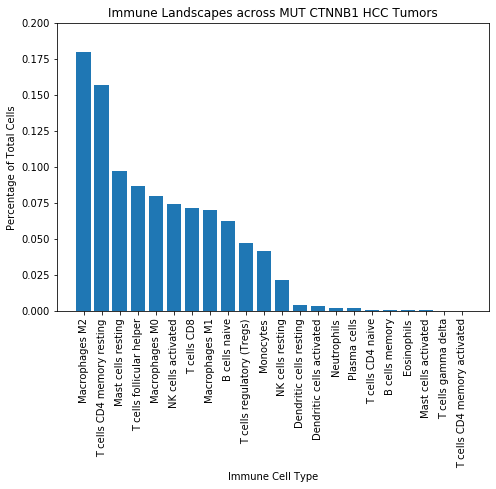

In [12]:
#print(df2.mean(axis = 0))
means = list(df2.mean(axis = 0))

means = means[:22]

means_new = [mean/sum(means) for mean in means]
clmn2 = list(col2)

clmn2 = clmn2[1:23]


dct = {} 
for key in clmn2: 
    for value in means_new: 
        dct[key] = value 
        means_new.remove(value) 
        break 

sorted_dct = dict(sorted(dct.items(), key=operator.itemgetter(1),reverse=True))


cell_types = list(sorted_dct.keys())
values = list(sorted_dct.values())


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation=90)

ax.bar(cell_types,values)

plt.title('Immune Landscapes across MUT CTNNB1 HCC Tumors')
plt.xlabel('Immune Cell Type')
plt.ylabel('Percentage of Total Cells')
plt.ylim(0, 0.2)


plt.show()

# Analyzing WT CTNNB1 CIBERSORTx Result

## Importing CIBERSORTx Results as Dataframe (df_2)

In [16]:
df_2 = pd.read_csv('CIBERSORTx_WT_CTNNB1_Results.csv')
col_2 = df_2.head(20532)  
col_2

,Mixture,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),...,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,Correlation,RMSE
0,TCGA-2Y-A9H1-01,0.000000,0.0,0.000000,0.117471,0.0,0.105103,0,0.051690,0.220762,...,0.207845,0.0,0.000000,0.000982,0.0,0.000000,0.000000,0.65,0.005879,1.116167
1,TCGA-2Y-A9HA-01,0.052650,0.0,0.000000,0.000000,0.0,0.247109,0,0.006177,0.048453,...,0.117191,0.0,0.000000,0.128736,0.0,0.007059,0.000000,0.37,0.044839,1.072891
2,TCGA-2Y-A9HB-01,0.011983,0.0,0.000000,0.000000,0.0,0.337790,0,0.040968,0.083878,...,0.087242,0.0,0.000000,0.185402,0.0,0.000000,0.000000,0.73,-0.005573,1.097140
3,TCGA-3K-AAZ8-01,0.111041,0.0,0.000000,0.140853,0.0,0.300706,0,0.042905,0.037790,...,0.155841,0.0,0.000000,0.002353,0.0,0.000000,0.000000,0.87,-0.019839,1.128185
4,TCGA-4R-AA8I-01,0.068325,0.0,0.000000,0.036896,0.0,0.068525,0,0.168273,0.011733,...,0.181622,0.0,0.050724,0.037064,0.0,0.000000,0.000000,0.83,-0.016779,1.103079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,TCGA-WX-AA47-01,0.178645,0.0,0.017624,0.000000,0.0,0.156793,0,0.056509,0.159437,...,0.014838,0.0,0.041264,0.000000,0.0,0.000000,0.000000,0.80,-0.011669,1.112145
92,TCGA-XR-A8TF-01,0.012136,0.0,0.000000,0.289223,0.0,0.022095,0,0.153332,0.001057,...,0.171851,0.0,0.000000,0.128574,0.0,0.000843,0.000000,0.94,-0.042663,1.115395
93,TCGA-ZP-A9CV-01,0.151718,0.0,0.000000,0.000000,0.0,0.303039,0,0.046787,0.020265,...,0.179057,0.0,0.029069,0.038571,0.0,0.000000,0.020096,0.83,-0.017168,1.094346
94,TCGA-ZP-A9D4-01,0.062528,0.0,0.000000,0.000000,0.0,0.250005,0,0.083573,0.018274,...,0.197630,0.0,0.000000,0.184788,0.0,0.000000,0.001667,0.91,-0.031391,1.102654


## Visualizing MUT CTNNB1 CIBERSORTx Result
- First find mean of each subtype across samples
- Create a dictionary of keys (type of cell) and values (means of percentage of that cell type)
- Sort dictionary in descending fashion for easier visualization
- Plot figure

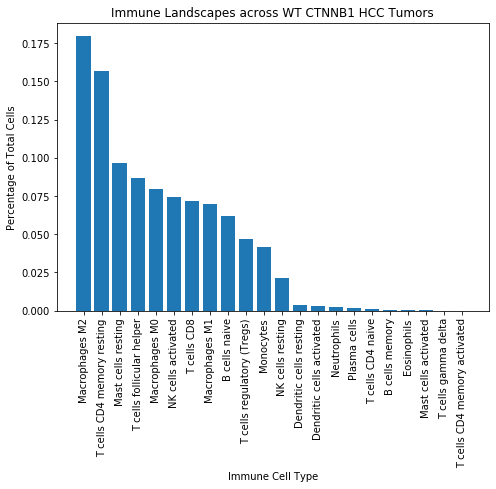

In [18]:
#print(df_2.mean(axis = 0))
means_1 = list(df_2.mean(axis = 0))

means_1 = means_1[:22]

means_new_1= [mean/sum(means) for mean in means_1]
clmn_2 = list(col_2)
#print(clmn_2)

clmn_2 = clmn_2[1:23]
#print(clmn_2)

dct_1 = {} 
for key_2 in clmn_2: 
    for value_2 in means_new_1: 
        dct_1[key_2] = value_2 
        means_new_1.remove(value_2) 
        break 

sorted_dct_1 = dict(sorted(dct_1.items(), key=operator.itemgetter(1),reverse=True))


cell_types_1 = list(sorted_dct_1.keys())
values_1 = list(sorted_dct_1.values())


fig_1 = plt.figure()
ax = fig_1.add_axes([0,0,1,1])
plt.xticks(rotation=90)

plt.title('Immune Landscapes across WT CTNNB1 HCC Tumors')
plt.xlabel('Immune Cell Type')
plt.ylabel('Percentage of Total Cells')

ax.bar(cell_types_1,values_1)
plt.show()